In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
data=pd.read_csv('C:\\Users\\vishw\\excelr drive files\\Assignments questions of excelr\\PCA\\wine.csv')
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler=StandardScaler()
scaler.fit(data)
scaled_data= scaler.transform(data)

In [70]:
from sklearn.decomposition import PCA
pca= PCA(n_components=10)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)

In [71]:
scaled_data.shape

(178, 14)

In [72]:
x_pca.shape

(178, 10)

In [73]:
var = pca.explained_variance_ratio_
var
pca.components_[0]

array([ 0.39366953, -0.13632501,  0.22267638, -0.00225793,  0.22429849,
       -0.12463016, -0.35926404, -0.39071171,  0.2670012 , -0.2790625 ,
        0.08931829, -0.27682265, -0.35052618, -0.26951525])

# cummulative variance

In [74]:
var1=np.cumsum(np.round(var,decimals=4)*100)
var1

array([39.54, 57.38, 67.71, 74.34, 80.61, 85.42, 89.38, 91.88, 93.98,
       95.85])

# Variance plot for PCA components obtained

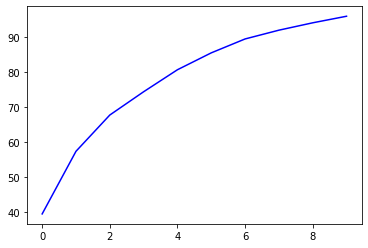

In [75]:
plt.plot(var1,color='blue')

# K-Means

# Using elbow method to find the optimum number of clusters

C:\Users\vishw\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


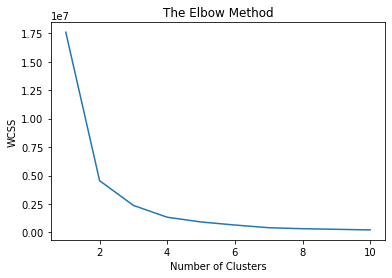

In [76]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting k means to the dataset

In [93]:
X=data.iloc[:,[0,6,7]]
X.head()

,Type,Phenols,Flavanoids
0,1,2.80,3.06
1,1,2.65,2.76
2,1,2.80,3.24
3,1,3.85,3.49
4,1,2.80,2.69


In [77]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(data)
y_kmeans

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2])

# Normalisation function

In [108]:
def norm_func(i):
    x = (i-i.min())	/	(i.max()	-	i.min())
    return (x)

df_norm = norm_func(X)

In [109]:
df_norm.head()

,Type,Phenols,Flavanoids
0,0.0,0.627586,0.573840
1,0.0,0.575862,0.510549
2,0.0,0.627586,0.611814
3,0.0,0.989655,0.664557
4,0.0,0.627586,0.495781


# Screw plot or elbow curve

In [112]:
from scipy.spatial.distance import cdist
k=list(range(2,15))
k
TWSS=[]
for i in k:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    WSS=[]
    for j in range (i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

([<matplotlib.axis.XTick at 0x1f964b03a90>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

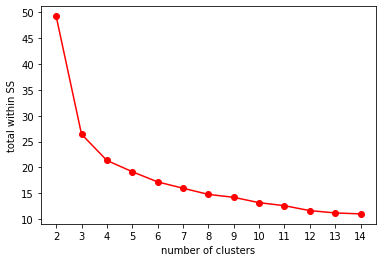

In [114]:
plt.plot(k,TWSS, 'ro-')
plt.xlabel("number of clusters")
plt.ylabel("total within SS")
plt.xticks(k)

# Selecting 5 clusters from the above plot

In [115]:
model=KMeans(n_clusters=5)
model.fit(df_norm)

KMeans(n_clusters=5)

In [119]:
model.labels_ 
md=pd.Series(model.labels_)
md

0      2
1      2
2      2
3      4
4      2
      ..
173    1
174    1
175    1
176    1
177    1
Length: 178, dtype: int32

# Hirarchecal Clustering

In [122]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

In [124]:
z= linkage(df_norm,method="complete",metric="euclidean")

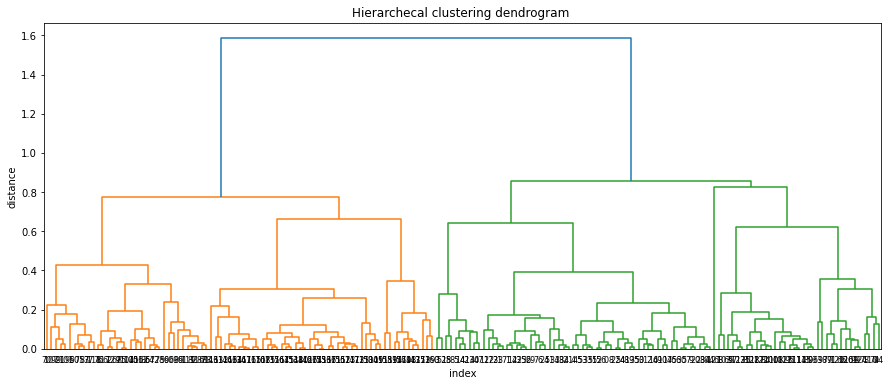

In [127]:
plt.figure(figsize=(15,6))
plt.title('Hierarchecal clustering dendrogram ')
plt.xlabel('index')
plt.ylabel('distance')

sch.dendrogram(
                z,
                leaf_rotation=0,
                leaf_font_size=8.,
               )
plt.show()

# Applying Agglomerative clustering

In [128]:
from sklearn.cluster import AgglomerativeClustering

In [133]:
h_clusters=AgglomerativeClustering(n_clusters=4,linkage='complete',affinity="euclidean",).fit(df_norm)

In [134]:
h_clusters.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 3, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [137]:
cluster_labels=pd.Series(h_clusters.labels_)

In [139]:
cluster_labels

0      2
1      2
2      2
3      2
4      2
      ..
173    0
174    0
175    0
176    0
177    0
Length: 178, dtype: int64